In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('measurements.csv') 


In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


## Cleaning

#### First let's rename the columns in the case snake formart 

In [4]:
df.columns=[e.lower().replace(' ', '_') for e in df.columns]


In [5]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


#### Now let's take a look at the missing values

In [6]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

The columns 'refill_liters' and 'refill_gas' haver too many missing values so we drop them.

In [7]:
drop_list = ['refill_liters', 'refill_gas']

In [8]:
df.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

We can see that 'AC', 'rain' and 'sun' are already in a different column so we keep only those and drop this one.

In [9]:
drop_list.append('specials')


In [10]:
df = df.drop(drop_list, axis=1)


In [11]:
df.temp_inside.value_counts(dropna=False)

21,5    133
22      102
22,5     59
20       25
21       13
23       13
NaN      12
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [12]:
df.temp_inside.dtypes

dtype('O')

We change the type of 'temp_inside' column into float, then we calculate the mean and replace the NaN values by the nearest 0.5 rounding.


In [13]:
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)


In [14]:
np.mean(df.temp_inside)

21.929521276595743

In [15]:
df.temp_inside = df.temp_inside.fillna(22)

In [16]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

### Columns types 

In [17]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

The columns 'distance' and 'consume' should be float and not sting so we change it.

In [18]:
df[['distance', 'consume']] = df[['distance', 'consume']].apply(lambda x: x.str.replace(',', '.')).astype(float)


In [19]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

In [20]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [21]:
df.to_csv('df.csv', index=False)


# Analysis

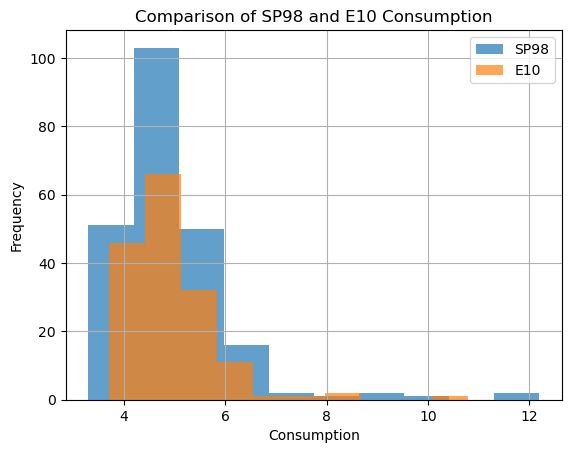

In [35]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']


plt.hist(col98['consume'], label='SP98', alpha=0.7, bins=20)
plt.hist(cole10['consume'], label='E10', alpha=0.7, bins=20)
plt.title('Comparison of SP98 and E10 consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



### Here we can see that SP98 comsumes generally more than E10.

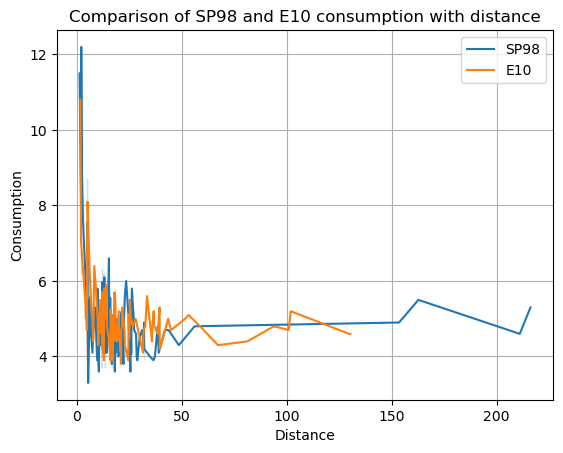

In [38]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']

ax1 = sns.lineplot(data=col98, x=col98["distance"], y=col98["consume"], label = 'SP98')
ax2 = sns.lineplot(data=cole10, x=cole10["distance"], y=cole10["consume"], label = 'E10')
plt.title('Comparison of SP98 and E10 consumption with distance')
plt.xlabel('Distance')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Here we can see that SP98 tends to consume more fuel on journeys between 60 and 100km.

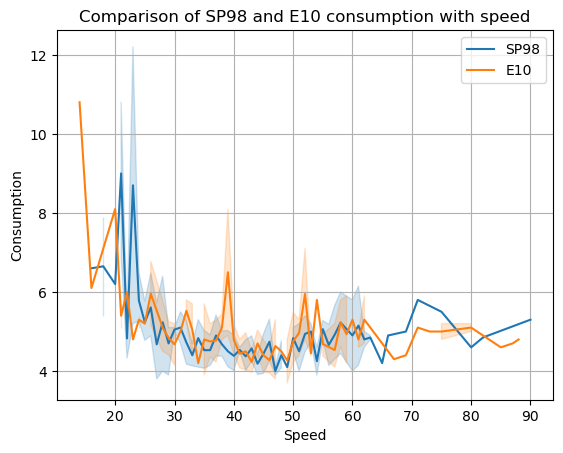

In [36]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']

ax1 = sns.lineplot(data=col98, x=col98["speed"], y=col98["consume"], label = 'SP98')
ax2 = sns.lineplot(data=cole10, x=cole10["speed"], y=cole10["consume"], label = 'E10')
plt.title('Comparison of SP98 and E10 consumption with speed')
plt.xlabel('Speed')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Here we can see that for a speed over 65km/h, SP98 consumes more than E10. We could recommand to use E10 for trip out of the city.

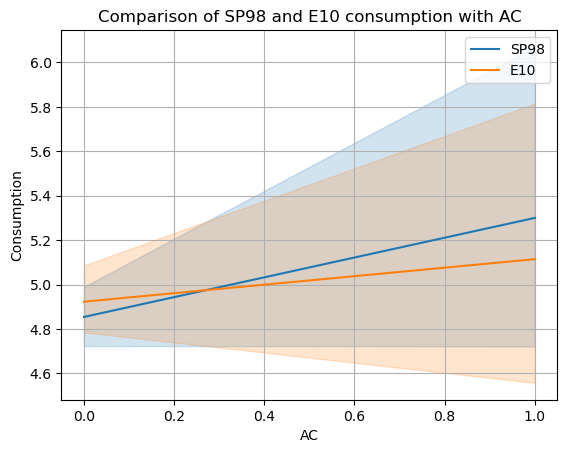

In [37]:
cole10 = df[df['gas_type'] == 'E10']
col98 = df[df['gas_type'] == 'SP98']

ax1 = sns.lineplot(data=col98, x=col98["ac"], y=col98["consume"], label = 'SP98')
ax2 = sns.lineplot(data=cole10, x=cole10["ac"], y=cole10["consume"], label = 'E10')
plt.title('Comparison of SP98 and E10 consumption with AC')
plt.xlabel('AC')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

### Here we can see that the use of AC increase more the consumption of SP98 than E10. During periods of high temperatures, when people tend to turn on the air conditioning, it's preferable to use E10.


## To sum up, it's better to use E10 than SP98 because it consumes less fuel, especially on longer journeys and at higher speeds. It also consumes less fuel when the air conditioning is on, and is generally cheaper than SP98.